In [ ]:
\l cure.q
\c 25 200
sample:readsam[SIMPLE_SAMPLES[`:SAMPLE_SIMPLE1]]`

In [ ]:
imax:{x?max x};
imin:{x?min x};

numRecalcs:()

cure:{[qu;com;numR;sam;distMat]
  old:qu j:j,qu[;`closestIdx]j@:imin qu[j:where qu`valid]`closestDist;
  qu[j;`valid]:0b;
  mean:avg pts:sam idx:raze old`idx;
  maxFromMean:idx imax sum each{x*x}mean-/:pts;
  rep:sam numR{[idx;distMat;i]union[i]idx imax -0w^min distMat[i;idx]}[idx;distMat]/enlist maxFromMean;
  rep:(rep*1-com)+\:com*mean;
  new:`closestIdx`closestDist!(k;d)@\:imin d:{min sum each x*x:raze x-/:\:y}[rep]each qu[k:where qu`valid]`rep;
  idxNew:count qu;
  qu[l;`closestIdx`closestDist]:(idxNew;d k?l:exec i from qu where valid,closestDist>d);
  qu:qu upsert update rep,idx,valid:1b from new;
  j:exec i from qu where valid,closestIdx in j;
  numRecalcs,:count j;
  qu[j;`closestIdx`closestDist]:flip(kk@'l;d@'l:imin each d:{min sum each x*x:raze x-/:\:y}/:'[qu[j]`rep]qu[`rep]kk:(k,idxNew)except/:j);
  qu};

cureClust:{[sample;numRep;comp;numClust] 
 distMat:{[fx;x;i]@[;i;:;0n]sum fx*fx-:x}[flip sample]'[sample;j:til count sample];
 queue:update idx:enlist each i,valid:1b from([]rep:enlist each sample);
 queue:queue,'flip`closestIdx`closestDist!
  flip{[distMat;x;y]y[i],d i:imin d:distMat[x]y}[distMat]\:[j;j];
 
 res:{[n;x]n<sum x`valid}[numClust]cure[;comp;numRep;sample;distMat]/queue;
 
 delete valid from update pts:sample idx from select from res where valid
 
 }

/time2                time3                time4               
/--------------------------------------------------------------
/0D00:00:20.897871000 0D00:00:00.328323000 0D00:00:14.925986000

In [ ]:
update rep,idx,valid:1b from new from qu where rep=old`rep

In [ ]:
/sample:readsam[FCPS_SAMPLES[`:SAMPLE_TARGET]]`
sample:readsam[SIMPLE_SAMPLES[`:SAMPLE_SIMPLE1]]`


\t r:cureClust[sample;5;0.5;2]
/[sample;numRep;comp;numClust]

In [ ]:
{plt[`:scatter][;]. flip x`pts}each r;
plt[`:show][];

In [ ]:
dsc:{[n;r;s](r+n?s-r)*/:(cos;sin)@\:4*n?acos 0}
data :flip(-5 1)+(1 1.5)*dsc[1000; 0;1.8],'dsc[2000;3.1;4.2],'dsc[4000;5.2;6.5]
data,:flip(4 -1)+(1 8)*dsc[4000; 0;1.]
data@:neg[4000&count data]?count data

In [ ]:
sample:data

In [ ]:
\t distMat:{d:{sum{x*x}each x}each(x-\:flip x);.[;;:;0n]/[d;2#'til count d]}sample;

newDist:-1_({{sum{x*x}each x}each(1_(sample(x)_til n)-\:sample x)}each til count sample)
newDist

In [ ]:
(1+til count distMat)_'distMat

In [ ]:
/ {d:{sum{x*x}each x}each(x-\:flip x);.[;;:;0n]/[d;2#'til count d]}x / original
/ {[fx;x;i]sum fx*fx:x-(1+i)_'fx}[flip x]'[x;til count x]  / upper triangular
/ {[fx;x;i]@[;i;:;0n]sum fx*fx-:x}[flip x]'[x;til count x] / square


In [1]:
\l cure.q
\c 25 200
sample:readsam[SIMPLE_SAMPLES[`:SAMPLE_SIMPLE1]]`

In [2]:
/sample:readsam[FCPS_SAMPLES[`:SAMPLE_TARGET]]`
/sample:readsam[SIMPLE_SAMPLES[`:SAMPLE_SIMPLE1]]`

dsc:{[n;r;s](r+n?s-r)*/:(cos;sin)@\:4*n?acos 0}
data :flip(-5 1)+(1 1.5)*dsc[1000; 0;1.8],'dsc[2000;3.1;4.2],'dsc[4000;5.2;6.5]
data,:flip(4 -1)+(1 8)*dsc[4000; 0;1.]
data@:neg[4000&count data]?count data

sample:data

In [3]:
imax:{x?max x};
imin:{x?min x};

cure:{[qu;com;numR;sam;pointDist]
  old:qu j:j,qu[;`closestIdx]j@:imin qu[j:where qu`valid]`closestDist;
  qu[j;`valid]:0b;
  mean:avg pts:sam idx:raze old`idx;
  maxFromMean:idx imax sum each{x*x}mean-/:pts;
  rep:sam numR{[idx;pointDist;i]union[i]idx imax -0w^min pointDist[i;idx]}[idx;pointDist]/enlist maxFromMean;
  rep:(rep*1-com)+\:com*mean;
  new:`closestIdx`closestDist!(k;d)@\:imin d:{min sum each x*x:raze x-/:\:y}[rep]each qu[k:where qu`valid]`rep;
  qu[l;`closestIdx`closestDist]:(j0:first j;d k?l:exec i from qu where valid,closestDist>d);
  qu[j0]:update rep,idx,valid:1b from new;
  j:exec i from qu where valid,closestIdx in j;
  qu[j;`closestIdx`closestDist]:flip(kk@'l;d@'l:imin each d:{min sum each x*x:raze x-/:\:y}/:'[qu[j]`rep]qu[`rep]kk:(k,j0)except/:j);
  qu}

cureClust:{[sample;numRep;comp;numClust] 
  pointDist:{[fx;x;i]@[;i;:;0n]sum fx*fx-:x}[flip sample]'[sample;j:til count sample];
  queue:update idx:enlist each i,valid:1b from([]rep:enlist each sample);
  queue:update clustDist:pointDist from queue,'flip`closestIdx`closestDist!
   flip{[pointDist;x;y]y[i],d i:imin d:pointDist[x]y}[pointDist]\:[j;j];
 
  res:{[n;x]n<sum x`valid}[numClust]cure[;comp;numRep;sample;pointDist]/queue;
  delete valid from update pts:sample idx from select from res where valid}

In [4]:
\t r:cureClust[sample;65;0;4]

38441


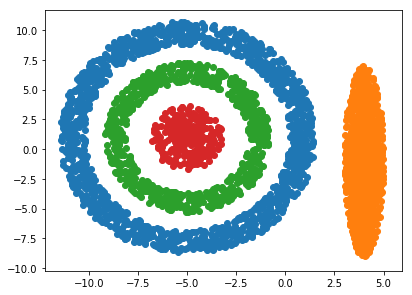

In [5]:
plt:.p.import[`matplotlib]`:pyplot;
{plt[`:scatter][;]. flip x`pts}each r;
plt[`:show][];

In [ ]:
numRep:65;comp:0;numClust:4;

In [ ]:
clustDist:pointDist:{[fx;x;i]@[;i;:;0n]sum fx*fx-:x}[flip sample]'[sample;j:til count sample];
queue:update idx:enlist each i,valid:1b from([]rep:enlist each sample);

In [ ]:
queue:queue,'flip`closestIdx`closestDist!
  flip{[pointDist;x;y]y[i],d i:imin d:pointDist[x]y}[pointDist]\:[j;j];

In [ ]:
queue:update clusterDist:pointDist from queue

In [ ]:
queue

In [ ]:
j0:first j:-2?4000
k:(asc -4000?4000)except j
d:count[k]?1f

In [ ]:
\t:1000 {[queue;k;j0;d]queue[j0;`clusterDist;k]:d}[queue;k;j0;d]

In [ ]:
\t:1000 {[queue;k;j0;d]queue[k;`clusterDist;j0]:d}[queue;k;j0;d]

In [ ]:
\t:1000 queue[j0;`clusterDist;k]:d

In [ ]:
\t:1000 queue[k;`clusterDist;j0]:d

In [ ]:
5#'iasc each 0w^pointDist